In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple, Union
from math import floor

In [2]:
# имитация plt.hist через plt.bar

def fast_hist(arr: List[Union[int, float]],
              bins: int, rwidth=1) -> Tuple[List[int], List[float]]:
    start, end = min(arr), max(arr)
    width = (end - start) / bins
    labels = [(start + i * width) for i in range(bins + 1)]
    counts = [0 for i in range(bins)]
    for x in arr:
        ind = floor((x - start) / width)
        if ind == len(counts):
            ind = ind - 1
        counts[ind] = counts[ind] + 1
    
    centers = [(labels[i] + labels[i + 1]) / 2 for i in range(bins)]
    plt.bar(x = centers, height=counts, width = width*rwidth)
    
    return counts, labels

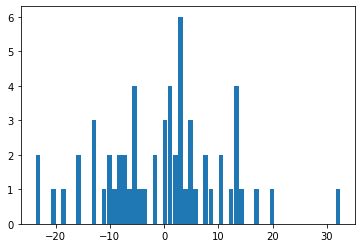

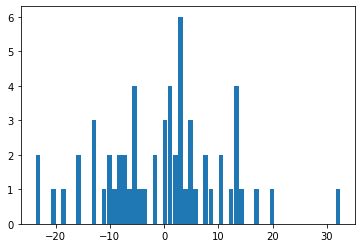

True
True


In [3]:
# проверка на случайных данных
np.random.seed(12345)

array = np.random.normal(scale=10, size=60)

t1, t2 = fast_hist(array, bins=len(set(array)), rwidth=0.9)
plt.show()
t3, t4, t5 = plt.hist(array, bins=len(set(array)), rwidth=0.9)
plt.show()

print(np.all(t1 == t3))
print(np.all(t2 == t4))

42.4 ms ± 965 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


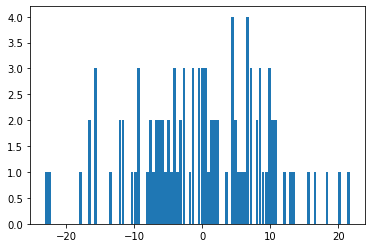

59.2 ms ± 813 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


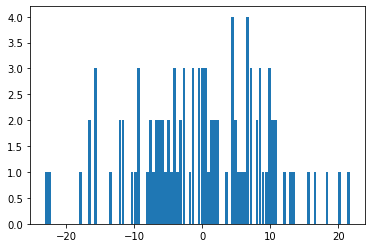

In [4]:
# сравнение по времени через timeit

array = np.random.normal(scale=10, size=100)

%timeit fast_hist(array, bins=len(set(array)), rwidth=0.9)
plt.show()

%timeit plt.hist(array, bins=len(set(array)), rwidth=0.9) 
plt.show()

<h4><b>Вывод</b>: моя функция работает чуть быстрее библиотечного аналога за счет уменьшенного функционала.</h4>